# Time Series

Time series is a **sequence of data points indexed in time order**. It is a collection of data points indexed in time order. Time series data is used in a wide range of applications, such as economics, finance, forecasting, and other areas. Time series are often used to analyze trends over time, such as sales, temperature, and stock prices.

# Import Packages

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from random import gauss
from random import seed

# Import Dataset

In [63]:
df = pd.read_csv("./data/nybirth.csv", parse_dates=["date"], index_col="date")
df.head()

,births
date,
1946-01-01,26.663
1946-02-01,23.598
1946-03-01,26.931
1946-04-01,24.740
1946-05-01,25.806


<AxesSubplot: xlabel='date'>

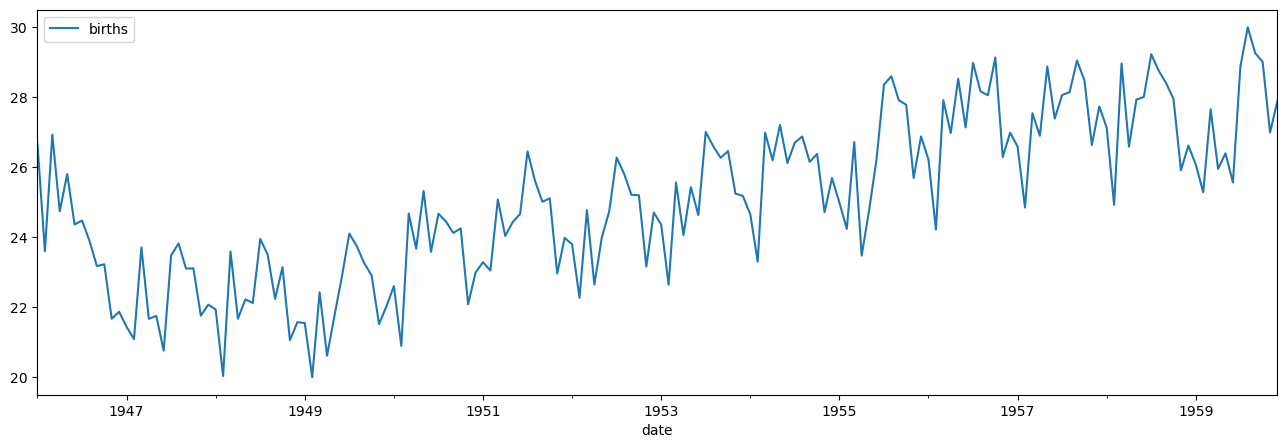

In [64]:
df.plot(y="births", figsize=(16, 5))

# Time Series Classical Components

A simple method of describing a time series is a classical decomposition: a proposition that a series can be decomposed into three main elements:

- Trend (Tt): long term movements in the mean
- Seasonal (St): repeated seasonal fluctuations (think: calendar or business cycles)
- Residuals (Et): Irregular components or random fluctuations not captured by the Trend and Seasonal

In [65]:
df.head()

,births
date,
1946-01-01,26.663
1946-02-01,23.598
1946-03-01,26.931
1946-04-01,24.740
1946-05-01,25.806


# Decompose Components

Decomposition procedures are used in time series to describe the trend and seasonal factors in a time series. More extensive decompositions might also include long-run cycles, holiday effects, day of week effects and so on. Here, we’ll only consider trend and seasonal decompositions.

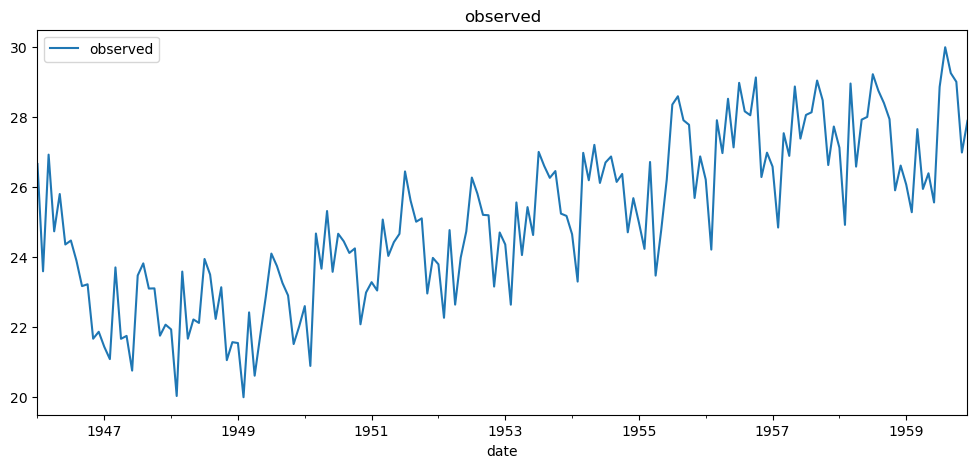

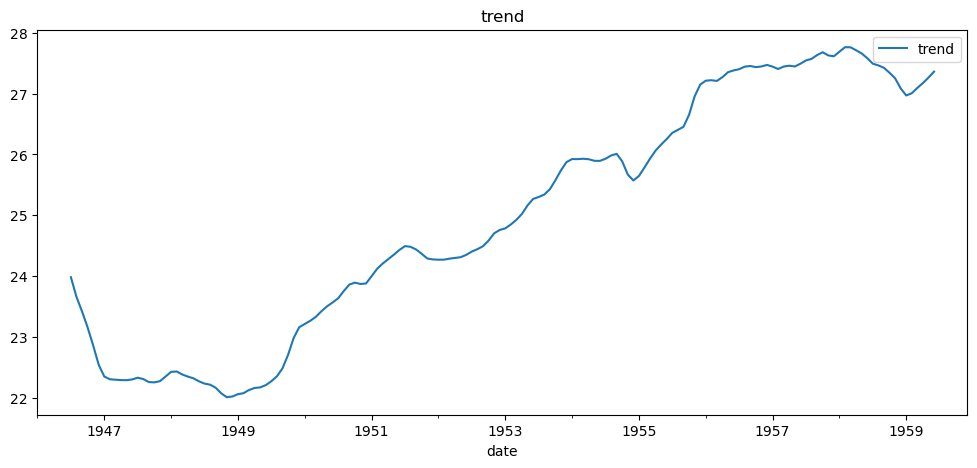

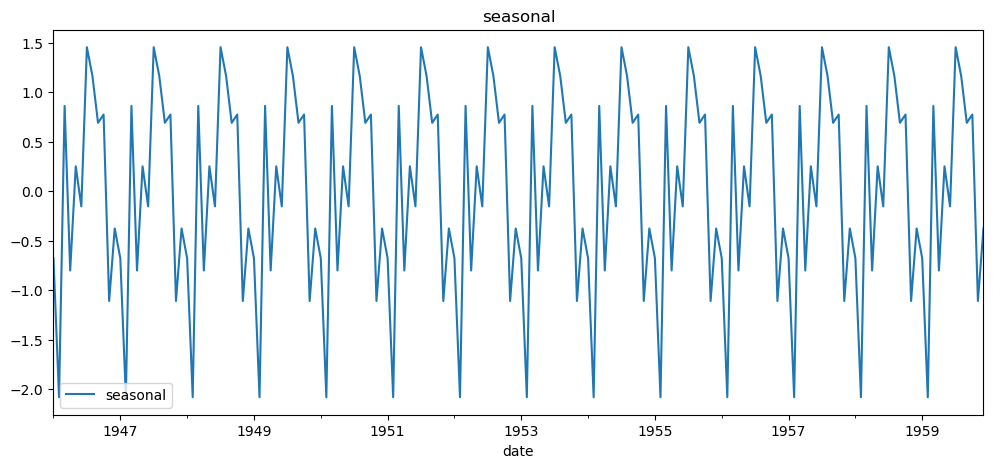

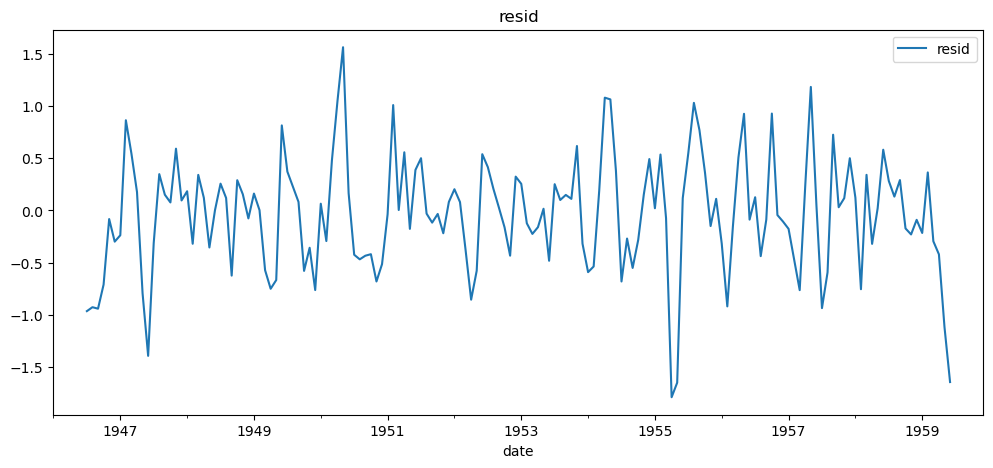

In [68]:
decomposed_df = df.copy()
result = seasonal_decompose(decomposed_df.births, model='additive', period=12)
decomposed_df["trend"] = result.trend
decomposed_df["seasonal"] = result.seasonal
decomposed_df["resid"] = result.resid
decomposed_df["observed"] = result.observed

for col in ["observed", "trend", "seasonal", "resid"]:
    decomposed_df.plot(y=col, figsize=(12, 5), title=col)

# Additive

A time series additive model is a mathematical model that is used to describe a time series data set. It is composed of several components that are added together to form the overall model. The components may include linear **trends**, **seasonal patterns**, and **cyclic pattern**s, as well as exogenous influences. The model is used to predict future values in the time series, as well as to explain the underlying trends and patterns in the data.

**y(t) = Trend + Seasonality + Noise**

In [69]:
add = pd.read_csv("data/daily_min_temp.csv", index_col="Date", parse_dates=["Date"])
# add = add.resample("M").interpolate("time")
add.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


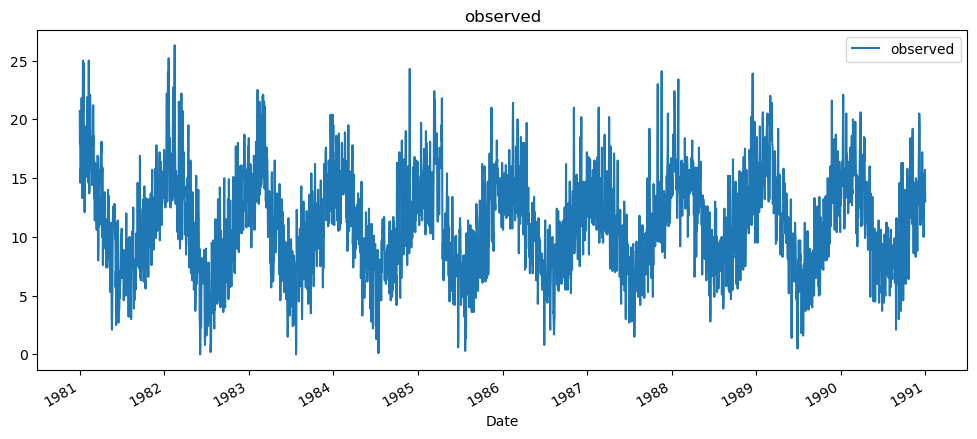

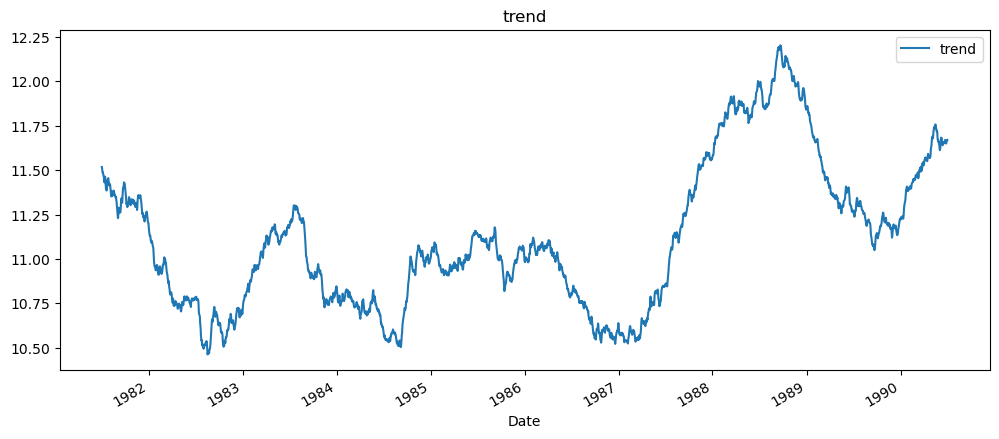

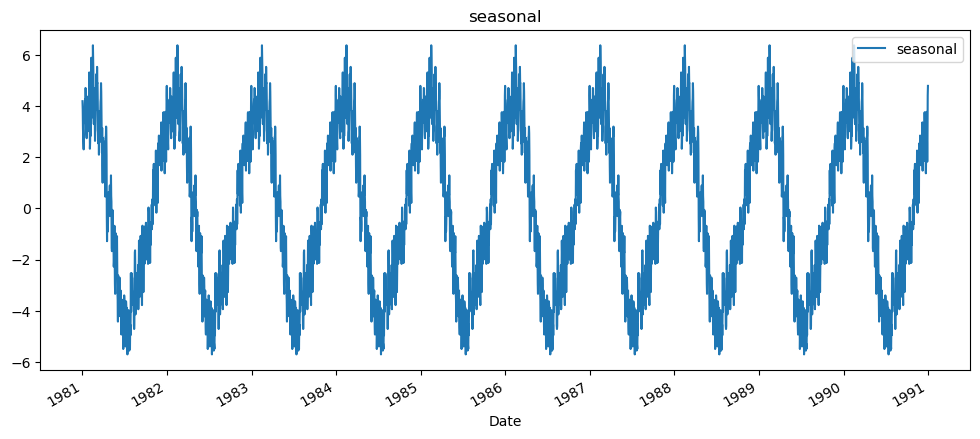

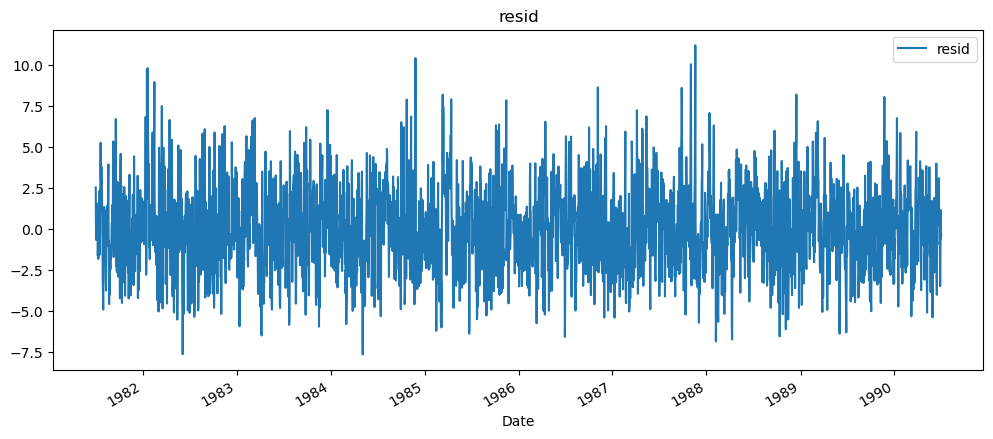

In [70]:
decomposed_df = add.copy()
result = seasonal_decompose(decomposed_df.Temp, model='additive', period=365)
decomposed_df["trend"] = result.trend
decomposed_df["seasonal"] = result.seasonal
decomposed_df["resid"] = result.resid
decomposed_df["observed"] = result.observed

for col in ["observed", "trend", "seasonal", "resid"]:
    decomposed_df.plot(y=col, figsize=(12, 5), title=col)

# Multiplicative

A time series multiplicative model is similar to an **additive model**, except that here **the components are multiplied** together instead of being added. As with the additive model, the components may include linear trends, seasonal patterns, and cyclic patterns, as well as exogenous influences. The multiplicative model is used to predict future values in the time series as well as to explain the underlying trends and patterns in the data.

**y(t) = Trend * Seasonality * Noise**

In [72]:
mul = pd.read_csv("data/airline.csv", index_col="Date")
mul.head()

,passengers
Date,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


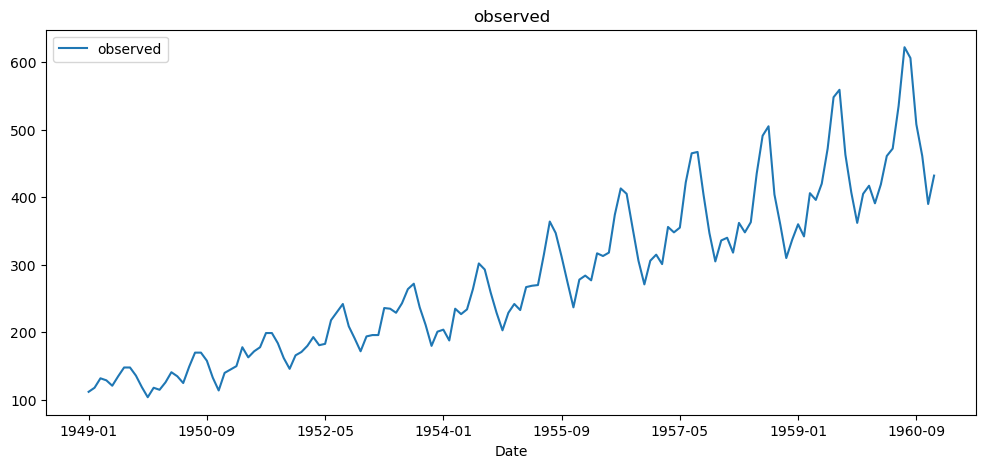

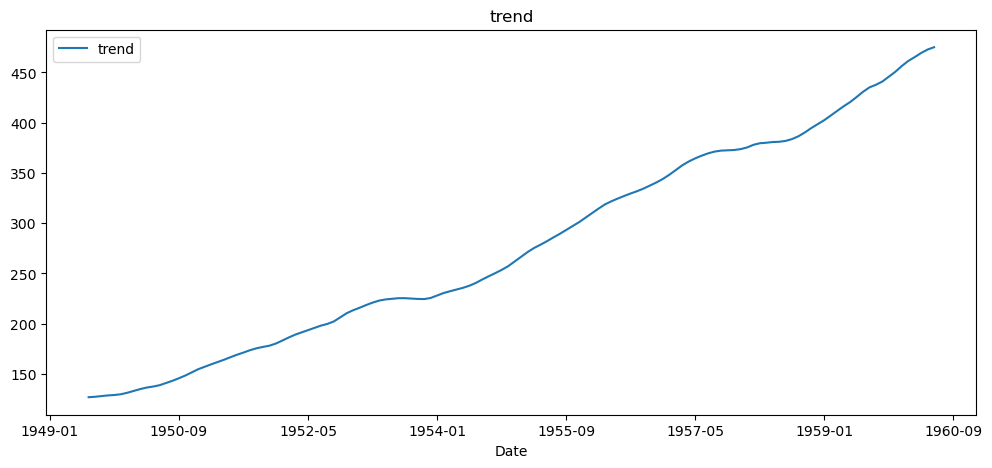

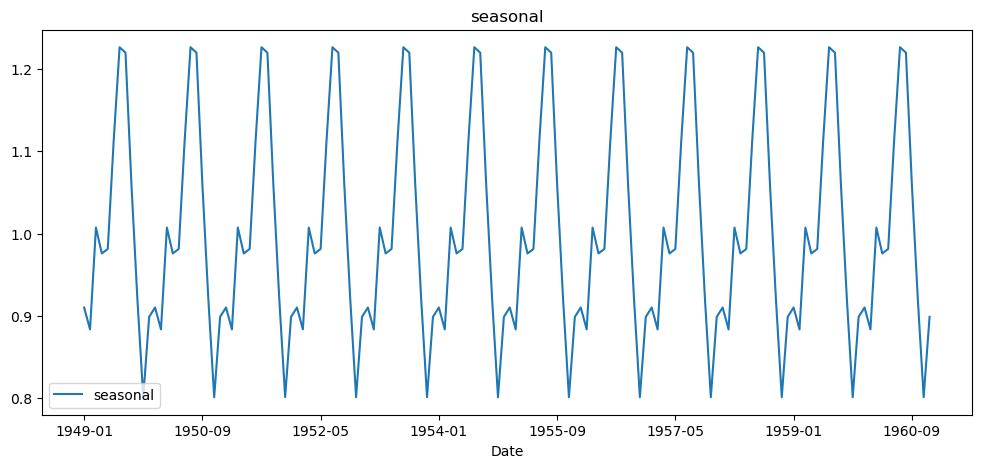

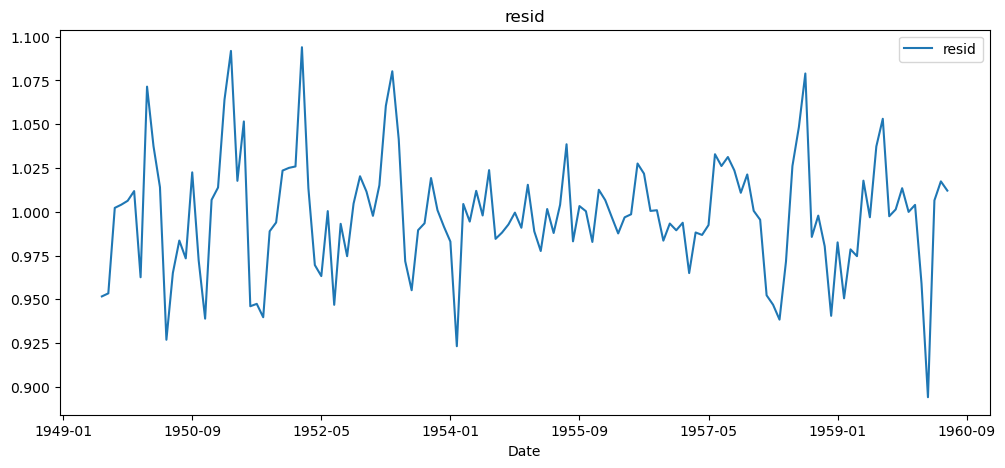

In [73]:
decomposed_df = mul.copy()
result = seasonal_decompose(decomposed_df.passengers, model='multiplicative', period=12)
decomposed_df["trend"] = result.trend
decomposed_df["seasonal"] = result.seasonal
decomposed_df["resid"] = result.resid
decomposed_df["observed"] = result.observed

for col in ["observed", "trend", "seasonal", "resid"]:
    decomposed_df.plot(y=col, figsize=(12, 5), title=col)

# Auto Correlation Plot

Auto Correlation Plot (ACF) is a type of plot used to measure the correlation between the **values of a time series** with the values of the same time series at **previous time steps**. It is usually used to identify **seasonality** or **cyclical patterns** in the data.

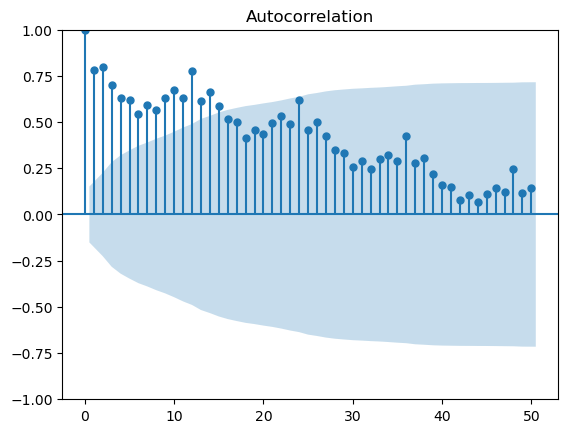

In [74]:
plot_acf(df.births, lags=50);

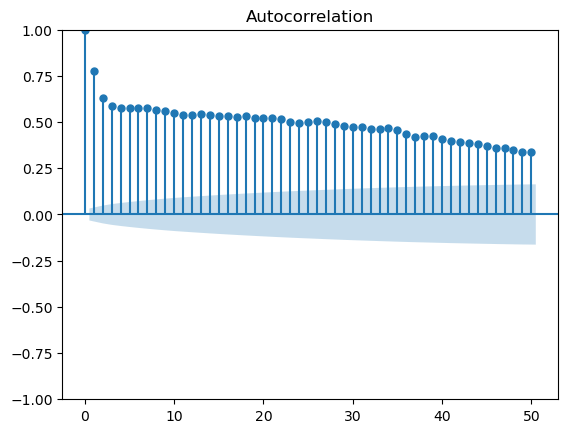

In [75]:
plot_acf(add, lags=50);

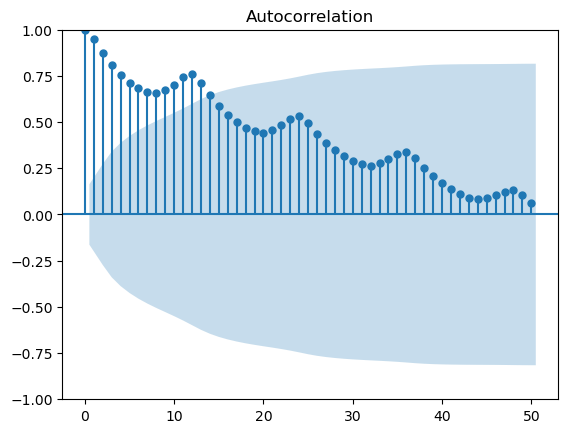

In [48]:
plot_acf(mul, lags=50);

In [76]:
mul.head(5)

,passengers
Date,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [56]:
mul.diff().dropna()

,passengers
Date,
1949-02,6.0
1949-03,14.0
1949-04,-3.0
1949-05,-8.0
1949-06,14.0
...,...
1960-08,-16.0
1960-09,-98.0
1960-10,-47.0


In [61]:
mul.diff().dropna().head()

,passengers
Date,
1949-02,6.0
1949-03,14.0
1949-04,-3.0
1949-05,-8.0
1949-06,14.0


Any assumption made by ACF ?

**Weak stationary** — meaning no systematic change in the mean, variance, and no systematic fluctuation.

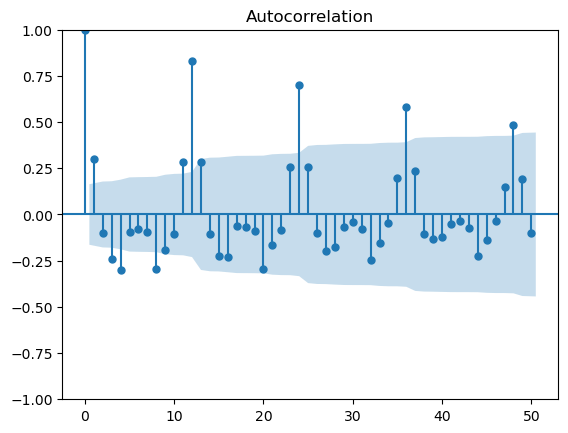

In [77]:
plot_acf(mul.diff().dropna(), lags=50);

# White Noise

White noise in time series is a random sequence of data points with a mean of zero and a constant variance across all points. It is often used as a baseline for comparison when analyzing other time series. It is also used as a form of random input to test algorithms.

<AxesSubplot: >

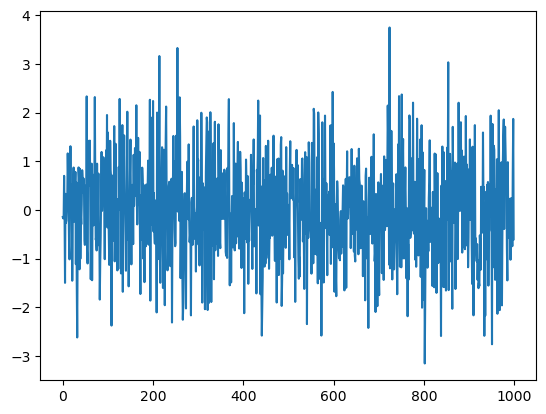

In [78]:
seed(42)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)
series.plot()

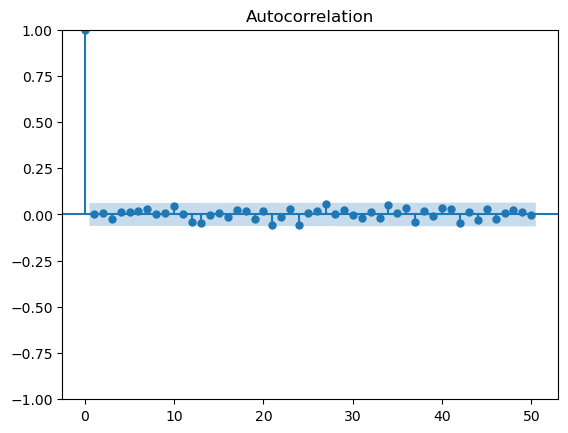

In [80]:
plot_acf(series, lags=50);

# Random Walk

Random walk in time series is similar to white noise in that it is a sequence of data points with a mean of zero, but the variance varies from point to point and is not constant. Random walk is a stochastic process that changes its direction at random, making it unpredictable and difficult to model. It is often used to generate stochastic models of financial markets and other complex systems.

<AxesSubplot: >

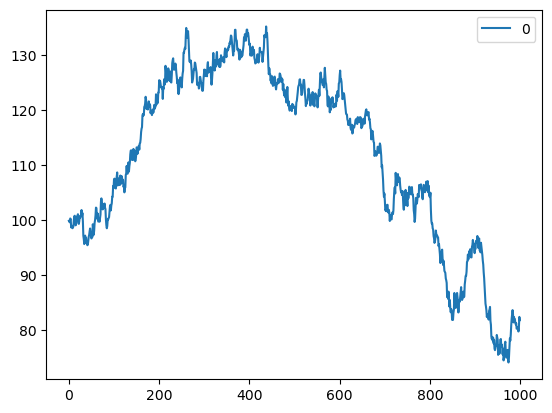

In [81]:
rwalk = pd.DataFrame(100 + np.cumsum(series))
rwalk.plot()

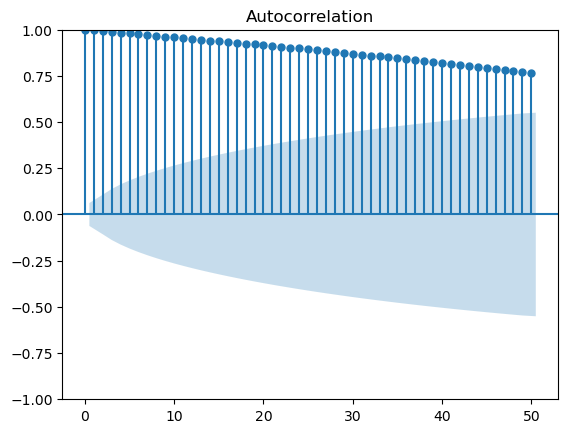

In [82]:
plot_acf(rwalk, lags=50);

# Reference

- https://otexts.com/fpp2/intro.html